### Cloning quasars

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation? 

(Hint: It shouldn't. But why?) 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import astropy
import astroML

In [2]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to /home/ludovicarbone/astroML_data
[=========================================]  12.82Mb / 12.82Mb   


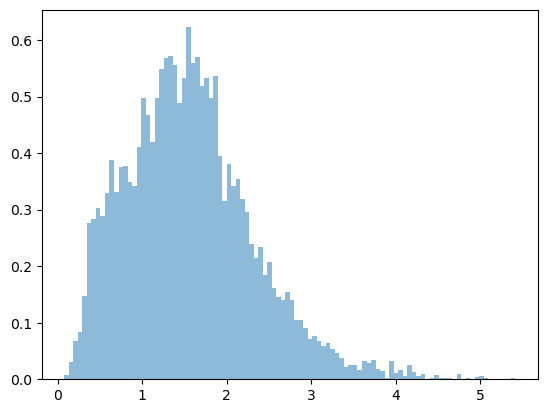

In [3]:
#istogramma dei redshift z
counts, bins = np.histogram(z, bins=100, density=True)
plt.hist(z, bins=100, histtype='stepfilled', alpha=0.5, density=True)
plt.show()

#### REJECTION SAMPLE

In [4]:
ymax = np.max(counts)
xmax = np.max(bins)
xmin = np.min(bins)

N=1000

x = np.random.uniform(xmin,xmax,N)
y = np.random.uniform(0,ymax,N)

devi capire i che bin c'è la tua y

In [5]:
plt.scatter(x[y<],y[y<],c='yellow')
plt.scatter(x[y>],y[y>],c='red')

plt.show()
goodpoints = x[y<f(x)]

SyntaxError: invalid syntax (3087612519.py, line 1)